# Import Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr
from matplotlib import rcParams

# Get S&P 500 Data

In [22]:
stock=['^GSPC']
data=dr.get_data_yahoo(stock, start='2019-09-01')['Adj Close']
data

Symbols,^GSPC
Date,
2019-09-03,2906.270020
2019-09-04,2937.780029
2019-09-05,2976.000000
2019-09-06,2978.709961
2019-09-09,2978.429932
...,...
2021-09-07,4520.029785
2021-09-08,4514.069824
2021-09-09,4493.279785


# Stock Data

In [23]:
stocks=['AAPL', 'MSFT', 'AMZN', 'EBAY', 'COKE', 'PEP', 'GOOG', 'FB', 'F', 'GM']
stocksDF = dr.get_data_yahoo(stocks, start = '2019-09-01')['Adj Close']

#Add S&P 500 data and rename the column "GSPC"
stocksDF['GSPC']=data

stocksDF

Symbols,AAPL,MSFT,AMZN,EBAY,COKE,PEP,GOOG,FB,F,GM,GSPC
Date,,,,,,,,,,,
2019-09-03,50.594368,133.285660,1789.839966,38.692806,331.243744,128.853714,1168.390015,182.389999,8.803351,35.719585,2906.270020
2019-09-04,51.452774,134.843491,1800.619995,38.595448,310.488281,130.437866,1181.410034,187.139999,8.900091,37.006691,2937.780029
2019-09-05,52.458755,137.214462,1840.719971,39.724873,303.569824,128.347229,1211.380005,190.899994,9.035527,37.857082,2976.000000
2019-09-06,52.453838,136.283707,1833.510010,39.306206,296.303894,129.659195,1204.930054,187.490005,9.035527,37.905952,2978.709961
2019-09-09,52.677666,134.735703,1831.349976,40.309074,290.288727,128.743652,1204.410034,188.759995,9.229008,38.687923,2978.429932
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07,156.690002,300.179993,3509.290039,74.709999,393.549988,154.529999,2910.379883,382.179993,12.950000,48.720001,4520.029785
2021-09-08,155.110001,300.209991,3525.500000,73.930000,400.649994,156.720001,2897.669922,377.570007,13.030000,48.970001,4514.069824
2021-09-09,154.070007,297.250000,3484.159912,73.000000,394.140015,155.729996,2898.270020,378.000000,12.760000,48.419998,4493.279785


# Sector Data

In [24]:
sectors=['XLE','XLB','XLI','XLY','XLP','XLV','XLF','SMH','XTL','XLU','IYR']
sectorsDF=dr.get_data_yahoo(sectors, start='2019-09-01')['Adj Close']
sectorsDF.rename(columns={'XLE':'Energy',
                      'XLB':'Materials', 
                      'XLI':'Industrial',
                      'XLY':'ConsDisc',
                      'XLP':'ConsStaple',
                      'XLV':'Health',
                      'XLF':'Financial',
                      'SMH':'InfoTech',
                      'XTL':'Communication',
                      'XLU':'Utilities',
                      'IYR':'RealEstate'
                     },inplace=True)
sectorsDF

Symbols,Energy,Materials,Industrial,ConsDisc,ConsStaple,Health,Financial,InfoTech,Communication,Utilities,RealEstate
Date,,,,,,,,,,,
2019-09-03,50.052628,53.987320,72.041000,116.636108,57.878708,86.600914,25.488770,110.177429,64.942230,59.627293,88.247002
2019-09-04,50.752655,54.649685,72.956795,117.791817,58.399967,86.658607,25.737532,113.425705,65.432953,59.683464,88.937019
2019-09-05,51.382698,54.736073,74.267868,120.044418,58.039822,87.514328,26.263767,116.869667,66.463478,59.037487,88.379333
2019-09-06,51.653957,54.947266,74.422119,120.338242,58.229374,87.754692,26.254200,116.967522,66.649956,58.803432,88.549484
2019-09-09,52.686512,54.659279,74.643845,120.798553,58.096695,86.947052,26.656050,117.417572,66.649956,58.513203,87.972893
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07,48.330002,84.809998,102.779999,184.059998,71.989998,136.050003,37.840000,272.730011,101.400002,68.570000,110.029999
2021-09-08,47.709999,84.000000,102.919998,184.270004,72.610001,135.990005,37.750000,269.130005,102.190002,69.800003,110.639999
2021-09-09,47.810001,84.029999,102.419998,184.029999,72.190002,134.419998,37.860001,270.239990,101.589996,69.419998,108.489998


# Rate of Returns

## New Dataframe

In [25]:
#Start date is the beginning of the Final Project
stocks=['AAPL', 'MSFT', 'AMZN', 'EBAY', 'COKE', 'PEP', 'GOOG', 'FB', 'F', 'GM']
returnsDF = dr.get_data_yahoo(stocks, start = '2021-08-23')['Adj Close']
returnsDF

Symbols,AAPL,MSFT,AMZN,EBAY,COKE,PEP,GOOG,FB,F,GM
Date,,,,,,,,,,
2021-08-23,149.710007,304.649994,3265.870117,73.030098,400.000000,156.775406,2821.989990,363.350006,12.73,48.180000
2021-08-24,149.619995,302.619995,3305.780029,72.670929,397.579987,154.828751,2847.969971,365.510010,13.08,49.570000
2021-08-25,148.360001,302.010010,3299.179932,73.987877,396.010010,154.143448,2859.000000,368.390015,13.17,49.700001
2021-08-26,147.539993,299.089996,3316.000000,75.464432,391.100006,153.577332,2842.459961,364.380005,12.90,48.619999
2021-08-27,148.600006,299.720001,3349.629883,76.232651,399.950012,153.885223,2891.010010,372.630005,13.31,49.799999
2021-08-30,153.119995,303.589996,3421.570068,77.370003,401.000000,154.938004,2909.389893,380.660004,13.05,49.169998
2021-08-31,151.830002,301.880005,3470.790039,76.739998,406.160004,155.325348,2909.239990,379.380005,13.03,49.009998
2021-09-01,152.509995,301.829987,3479.000000,76.150002,407.720001,156.835007,2916.840088,382.049988,13.11,49.110001
2021-09-02,153.649994,301.149994,3463.120117,76.489998,405.000000,156.949997,2884.379883,375.279999,13.01,48.950001


## Calculating Returns

In [26]:
returnsDF['AAPL_return']=round(((returnsDF['AAPL']/returnsDF['AAPL'].shift(1))-1)*100,2)
returnsDF['MSFT_return']=round(((returnsDF['MSFT']/returnsDF['MSFT'].shift(1))-1)*100,2)
returnsDF['AMZN_return']=round(((returnsDF['AMZN']/returnsDF['AMZN'].shift(1))-1)*100,2)
returnsDF['EBAY_return']=round(((returnsDF['EBAY']/returnsDF['EBAY'].shift(1))-1)*100,2)
returnsDF['COKE_return']=round(((returnsDF['COKE']/returnsDF['COKE'].shift(1))-1)*100,2)
returnsDF['PEP_return']=round(((returnsDF['PEP']/returnsDF['PEP'].shift(1))-1)*100,2)
returnsDF['GOOG_return']=round(((returnsDF['GOOG']/returnsDF['GOOG'].shift(1))-1)*100,2)
returnsDF['FB_return']=round(((returnsDF['FB']/returnsDF['FB'].shift(1))-1)*100,2)
returnsDF['F_return']=round(((returnsDF['F']/returnsDF['F'].shift(1))-1)*100,2)
returnsDF['GM_return']=round(((returnsDF['GM']/returnsDF['GM'].shift(1))-1)*100,2)
returnsDF

Symbols,AAPL,MSFT,AMZN,EBAY,COKE,PEP,GOOG,FB,F,GM,AAPL_return,MSFT_return,AMZN_return,EBAY_return,COKE_return,PEP_return,GOOG_return,FB_return,F_return,GM_return
Date,,,,,,,,,,,,,,,,,,,,
2021-08-23,149.710007,304.649994,3265.870117,73.030098,400.000000,156.775406,2821.989990,363.350006,12.73,48.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,149.619995,302.619995,3305.780029,72.670929,397.579987,154.828751,2847.969971,365.510010,13.08,49.570000,-0.06,-0.67,1.22,-0.49,-0.61,-1.24,0.92,0.59,2.75,2.89
2021-08-25,148.360001,302.010010,3299.179932,73.987877,396.010010,154.143448,2859.000000,368.390015,13.17,49.700001,-0.84,-0.20,-0.20,1.81,-0.39,-0.44,0.39,0.79,0.69,0.26
2021-08-26,147.539993,299.089996,3316.000000,75.464432,391.100006,153.577332,2842.459961,364.380005,12.90,48.619999,-0.55,-0.97,0.51,2.00,-1.24,-0.37,-0.58,-1.09,-2.05,-2.17
2021-08-27,148.600006,299.720001,3349.629883,76.232651,399.950012,153.885223,2891.010010,372.630005,13.31,49.799999,0.72,0.21,1.01,1.02,2.26,0.20,1.71,2.26,3.18,2.43
2021-08-30,153.119995,303.589996,3421.570068,77.370003,401.000000,154.938004,2909.389893,380.660004,13.05,49.169998,3.04,1.29,2.15,1.49,0.26,0.68,0.64,2.15,-1.95,-1.27
2021-08-31,151.830002,301.880005,3470.790039,76.739998,406.160004,155.325348,2909.239990,379.380005,13.03,49.009998,-0.84,-0.56,1.44,-0.81,1.29,0.25,-0.01,-0.34,-0.15,-0.33
2021-09-01,152.509995,301.829987,3479.000000,76.150002,407.720001,156.835007,2916.840088,382.049988,13.11,49.110001,0.45,-0.02,0.24,-0.77,0.38,0.97,0.26,0.70,0.61,0.20
2021-09-02,153.649994,301.149994,3463.120117,76.489998,405.000000,156.949997,2884.379883,375.279999,13.01,48.950001,0.75,-0.23,-0.46,0.45,-0.67,0.07,-1.11,-1.77,-0.76,-0.33


## Drop the Stock Columns

In [27]:
returns1DF=returnsDF.drop(columns=['AAPL', 'MSFT', 'AMZN', 'EBAY', 'COKE', 'PEP', 'GOOG', 'FB', 'F', 'GM'])
returns1DF

Symbols,AAPL_return,MSFT_return,AMZN_return,EBAY_return,COKE_return,PEP_return,GOOG_return,FB_return,F_return,GM_return
Date,,,,,,,,,,
2021-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,-0.06,-0.67,1.22,-0.49,-0.61,-1.24,0.92,0.59,2.75,2.89
2021-08-25,-0.84,-0.20,-0.20,1.81,-0.39,-0.44,0.39,0.79,0.69,0.26
2021-08-26,-0.55,-0.97,0.51,2.00,-1.24,-0.37,-0.58,-1.09,-2.05,-2.17
2021-08-27,0.72,0.21,1.01,1.02,2.26,0.20,1.71,2.26,3.18,2.43
2021-08-30,3.04,1.29,2.15,1.49,0.26,0.68,0.64,2.15,-1.95,-1.27
2021-08-31,-0.84,-0.56,1.44,-0.81,1.29,0.25,-0.01,-0.34,-0.15,-0.33
2021-09-01,0.45,-0.02,0.24,-0.77,0.38,0.97,0.26,0.70,0.61,0.20
2021-09-02,0.75,-0.23,-0.46,0.45,-0.67,0.07,-1.11,-1.77,-0.76,-0.33


## Drop NAs

In [28]:
returns2DF=returns1DF.dropna()
returns2DF

Symbols,AAPL_return,MSFT_return,AMZN_return,EBAY_return,COKE_return,PEP_return,GOOG_return,FB_return,F_return,GM_return
Date,,,,,,,,,,
2021-08-24,-0.06,-0.67,1.22,-0.49,-0.61,-1.24,0.92,0.59,2.75,2.89
2021-08-25,-0.84,-0.20,-0.20,1.81,-0.39,-0.44,0.39,0.79,0.69,0.26
2021-08-26,-0.55,-0.97,0.51,2.00,-1.24,-0.37,-0.58,-1.09,-2.05,-2.17
2021-08-27,0.72,0.21,1.01,1.02,2.26,0.20,1.71,2.26,3.18,2.43
2021-08-30,3.04,1.29,2.15,1.49,0.26,0.68,0.64,2.15,-1.95,-1.27
2021-08-31,-0.84,-0.56,1.44,-0.81,1.29,0.25,-0.01,-0.34,-0.15,-0.33
2021-09-01,0.45,-0.02,0.24,-0.77,0.38,0.97,0.26,0.70,0.61,0.20
2021-09-02,0.75,-0.23,-0.46,0.45,-0.67,0.07,-1.11,-1.77,-0.76,-0.33
2021-09-03,0.42,-0.00,0.43,0.05,-1.60,0.09,0.39,0.26,-0.92,-0.27


# Plot the Data

## S&P 500

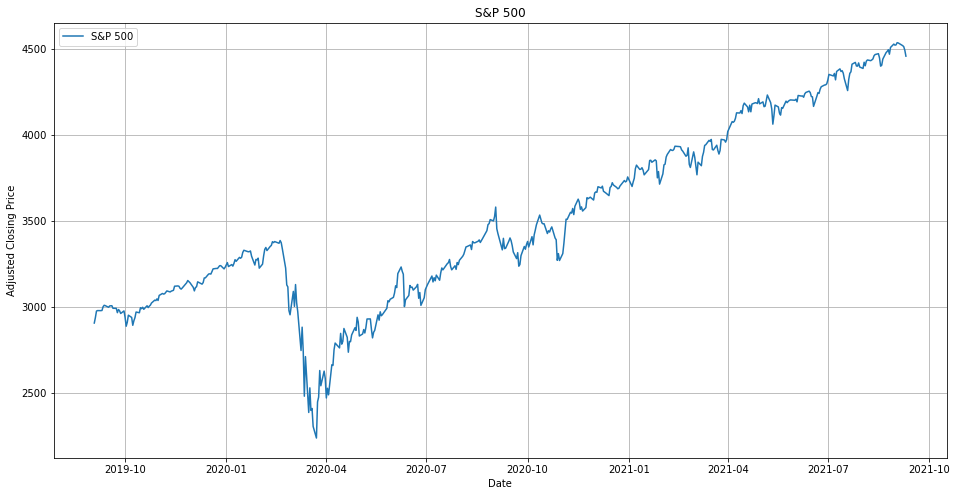

In [29]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.GSPC, label='S&P 500')
plt.title("S&P 500")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Sectors

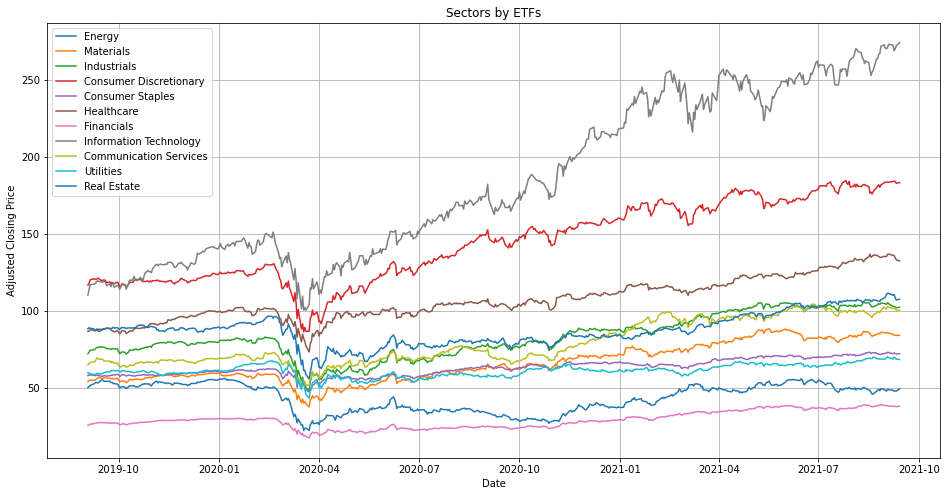

In [30]:
rcParams['figure.figsize'] = 16,8
plt.plot(sectorsDF.Energy, label='Energy')
plt.plot(sectorsDF.Materials, label='Materials')
plt.plot(sectorsDF.Industrial, label='Industrials')
plt.plot(sectorsDF.ConsDisc, label='Consumer Discretionary')
plt.plot(sectorsDF.ConsStaple, label='Consumer Staples')
plt.plot(sectorsDF.Health, label='Healthcare')
plt.plot(sectorsDF.Financial, label='Financials')
plt.plot(sectorsDF.InfoTech, label='Information Technology')
plt.plot(sectorsDF.Communication, label='Communication Services')
plt.plot(sectorsDF.Utilities, label='Utilities')
plt.plot(sectorsDF.RealEstate, label='Real Estate')
plt.title("Sectors by ETFs")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Apple vs Microsoft

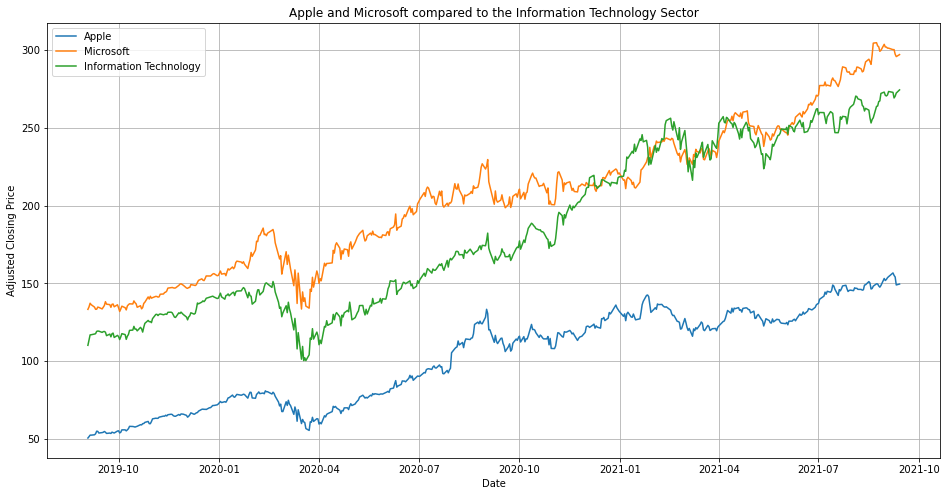

In [31]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.AAPL, label='Apple')
plt.plot(stocksDF.MSFT, label='Microsoft')
plt.plot(sectorsDF.InfoTech, label='Information Technology')
plt.title("Apple and Microsoft compared to the Information Technology Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

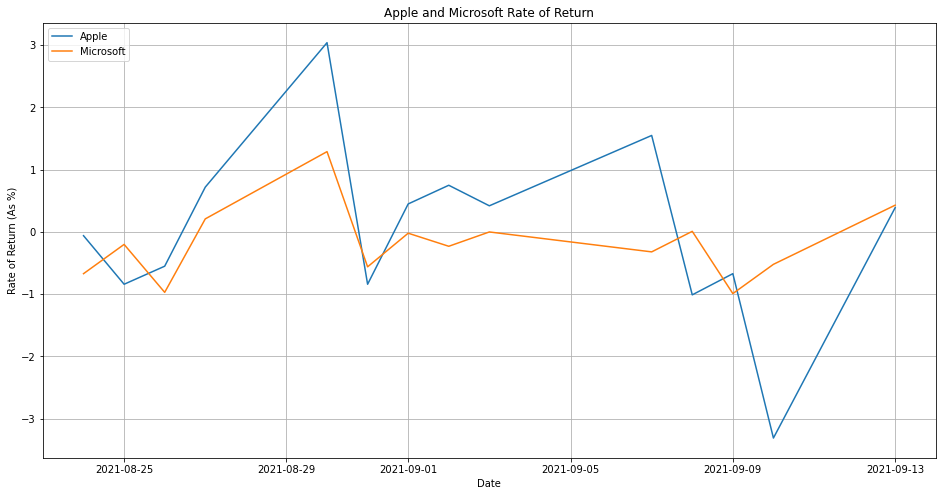

In [32]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.AAPL_return, label='Apple')
plt.plot(returns2DF.MSFT_return, label='Microsoft')
plt.title("Apple and Microsoft Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

## Amazon vs eBay

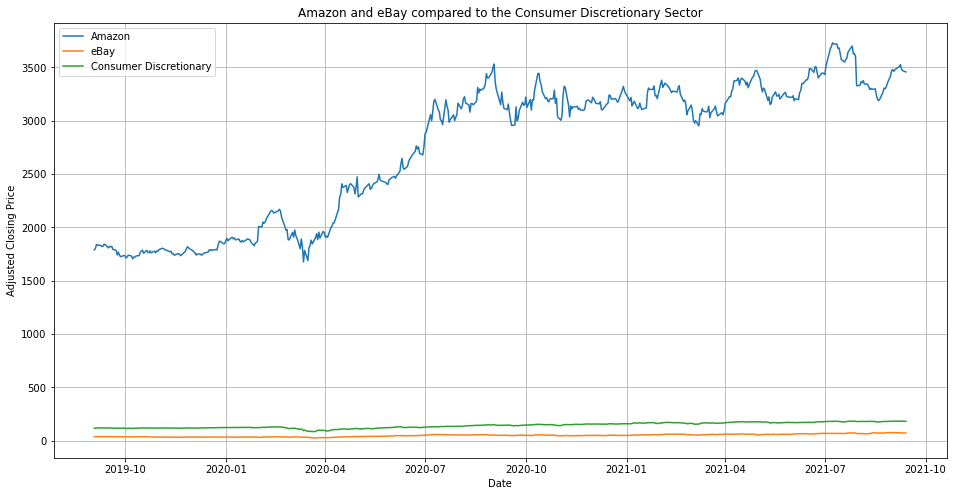

In [33]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.AMZN, label='Amazon')
plt.plot(stocksDF.EBAY, label='eBay')
plt.plot(sectorsDF.ConsDisc, label='Consumer Discretionary')
plt.title("Amazon and eBay compared to the Consumer Discretionary Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

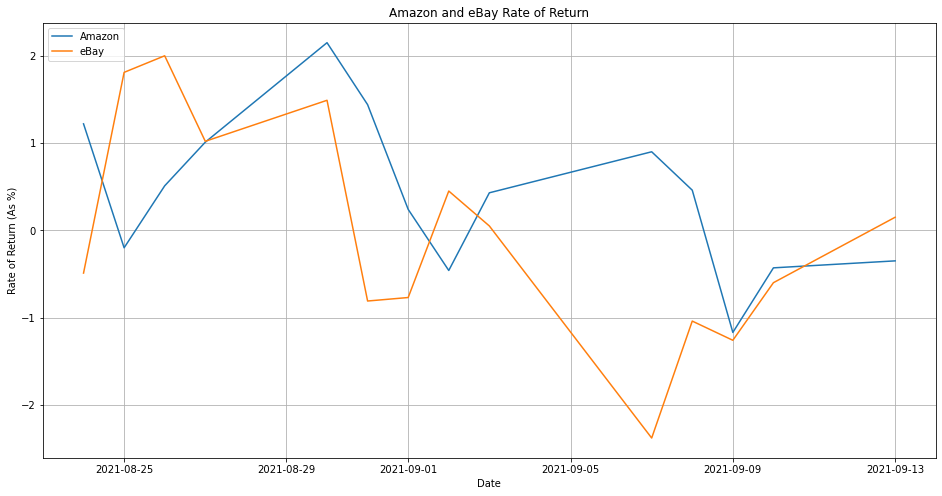

In [34]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.AMZN_return, label='Amazon')
plt.plot(returns2DF.EBAY_return, label='eBay')
plt.title("Amazon and eBay Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

## Coca-Cola vs Pepsi

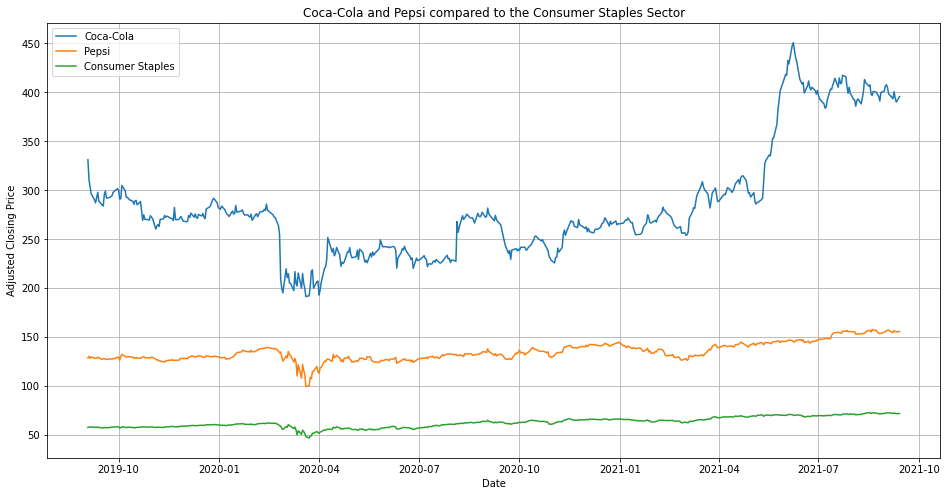

In [35]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.COKE, label='Coca-Cola')
plt.plot(stocksDF.PEP, label='Pepsi')
plt.plot(sectorsDF.ConsStaple, label='Consumer Staples')
plt.title("Coca-Cola and Pepsi compared to the Consumer Staples Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

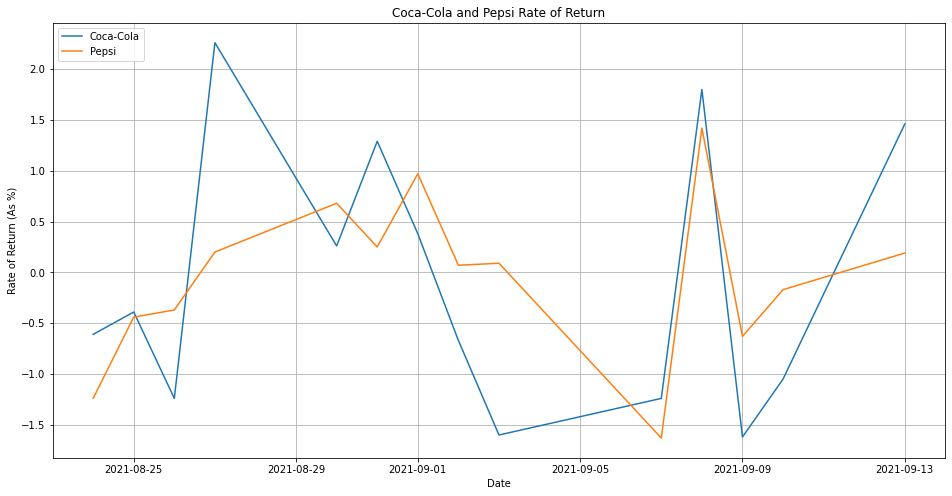

In [36]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.COKE_return, label='Coca-Cola')
plt.plot(returns2DF.PEP_return, label='Pepsi')
plt.title("Coca-Cola and Pepsi Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

## Google vs FaceBook

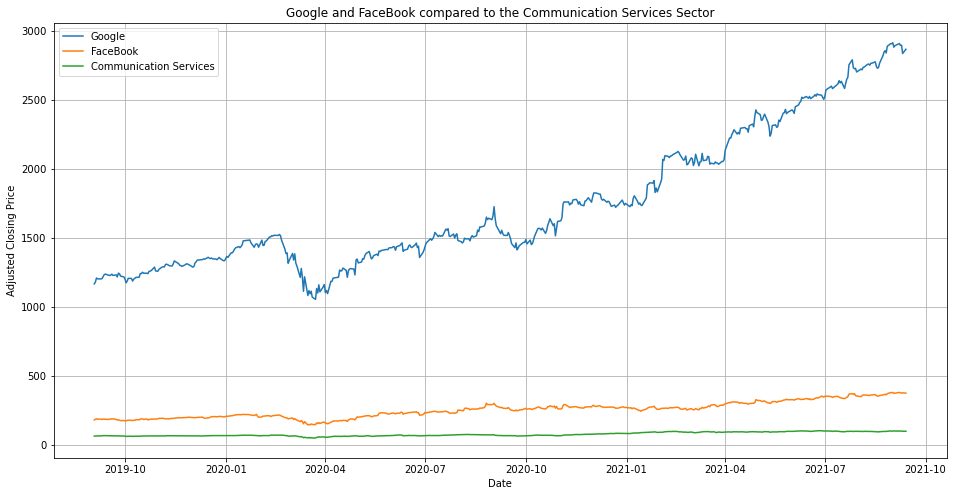

In [37]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.GOOG, label='Google')
plt.plot(stocksDF.FB, label='FaceBook')
plt.plot(sectorsDF.Communication, label='Communication Services')
plt.title("Google and FaceBook compared to the Communication Services Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

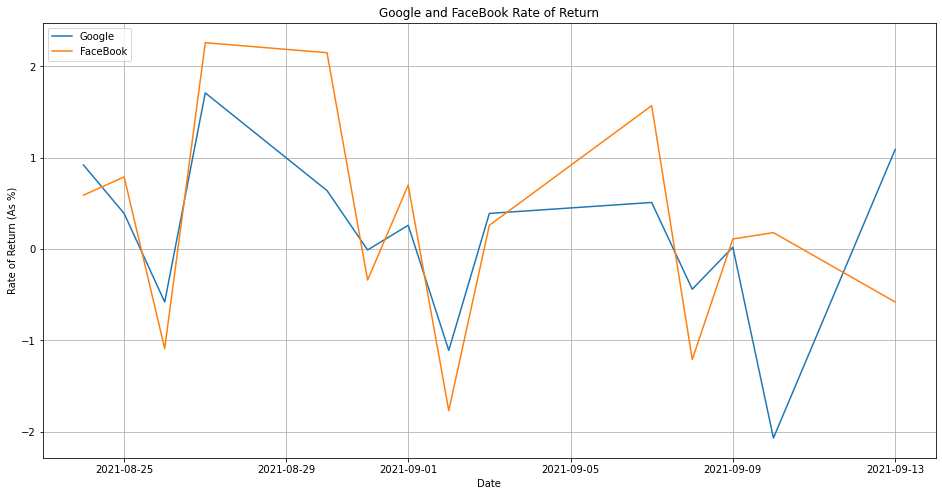

In [38]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.GOOG_return, label='Google')
plt.plot(returns2DF.FB_return, label='FaceBook')
plt.title("Google and FaceBook Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

## Ford vs GM

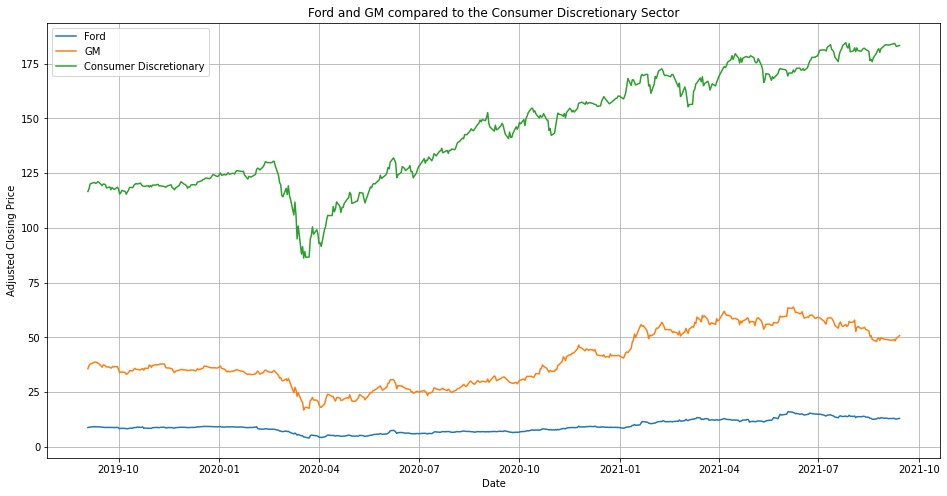

In [39]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.F, label='Ford')
plt.plot(stocksDF.GM, label='GM')
plt.plot(sectorsDF.ConsDisc, label='Consumer Discretionary')
plt.title("Ford and GM compared to the Consumer Discretionary Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

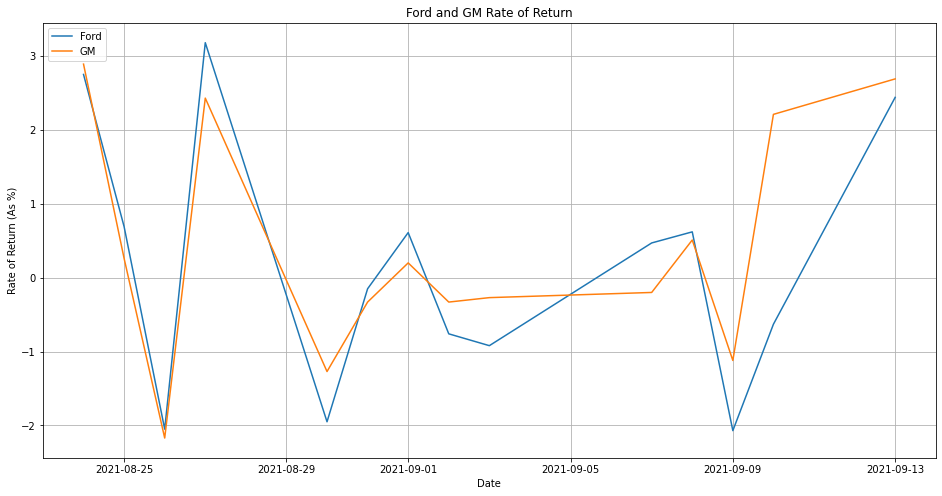

In [40]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.F_return, label='Ford')
plt.plot(returns2DF.GM_return, label='GM')
plt.title("Ford and GM Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);